# Cardiovascular Disease Prediction

## Dataset of the Project: 

**Name:** Cardiovascular Disease dataset<br>
**Author:** Svetlana Ulianova<br>
**Source**: [Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)<br>
**description:**<br>

### Machine Learning Algorithms Used and their Justification

1.**Binomial Logistic Regression:** We use a logistic function to model the binary dependent variable into two divisions - Cardiovascular Disease or not<br>

2.**Guassian Naive Bayes:** This algorithm uses Naive Bayes Probability theorem to decide weather probability (Cardiovascular Disease) is more than the other.<br>

3.**K-Nearest Neighbors Classification:** It is based on the position of input data in dataset space. It checks the no of K nearest neighbors around it and classifies for the presence or absence of Cardivascualr Disease<br>

4.**Decision Tree Classifier:** It uses a decision tree (as a predictive model) to go from observations about an items (represented in the branches) to conclusions about the item's target value (represented in the leaves). <br>

5.**Random Forest Classifier:** It constructs a multitude of decision trees at training time and outputs the class that is the mode of the classes or mean/average prediction of the individual trees.<br>

6.**SVM Classifier:** It represents the instances as points in space, divided by a clear gap based on the categories. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.<br>

### Further Approach/Plan for the Project

Perform **Exploratory Data Analysis (EDA)** to gain insights on the Data<br>
    - Data Summarization : Desribe the data and its distributions<br>
    - Data Visualization : Create graphical summaries of the data<br>
    
Apply the different Machine Learning Algorithms<br>
    - Do Hyper Parameter tuning for required algorithms<br>
    - Comparative analysis of all models<br>
    
Gain Insights from the results obtained<br>
    - Analyse the features which significantly affect the prediction.

### Initial Dataset Analysis

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
print('Null values count: ')
df.isnull().sum()

Null values count: 


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
print('The number of duplicated entries: ',df.duplicated().sum())

The number of duplicated entries:  0


In [6]:
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Data Pre-Processing

In [7]:
#Converting the age to years
df['age'] = df['age'].apply(lambda x:int(x/365))
df.head(10)

#Dropping id
df = df.drop('id',1)

## Data Visualization

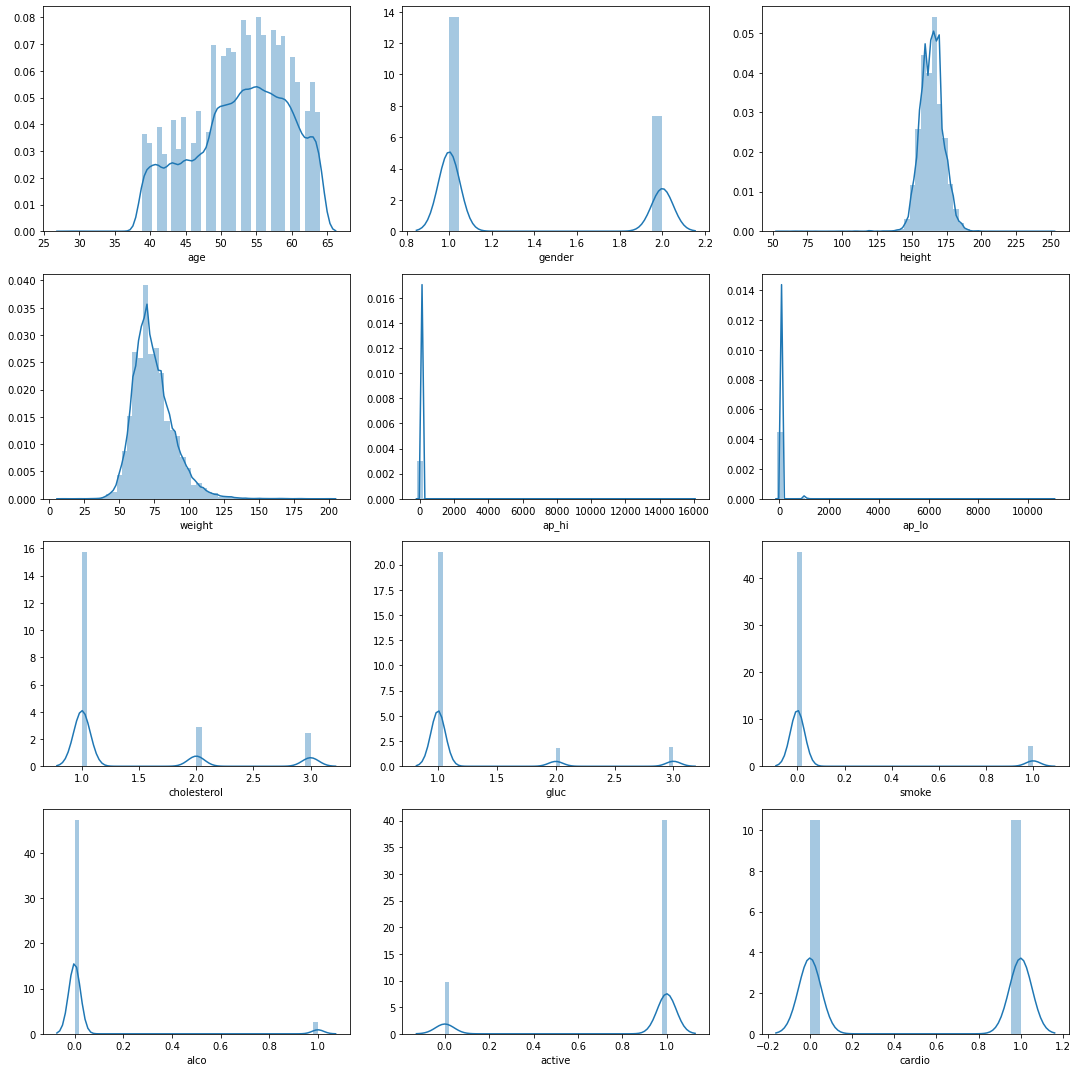

In [8]:
fig,distplt = plt.subplots(nrows=4,ncols=3,figsize=(15,15));
for (index,column) in enumerate(df.columns):
    sns.distplot(df[column],ax=distplt[index//3,index%3])
    
plt.tight_layout()
plt.show()

In [9]:
fig.savefig('DistributionPlot.png')

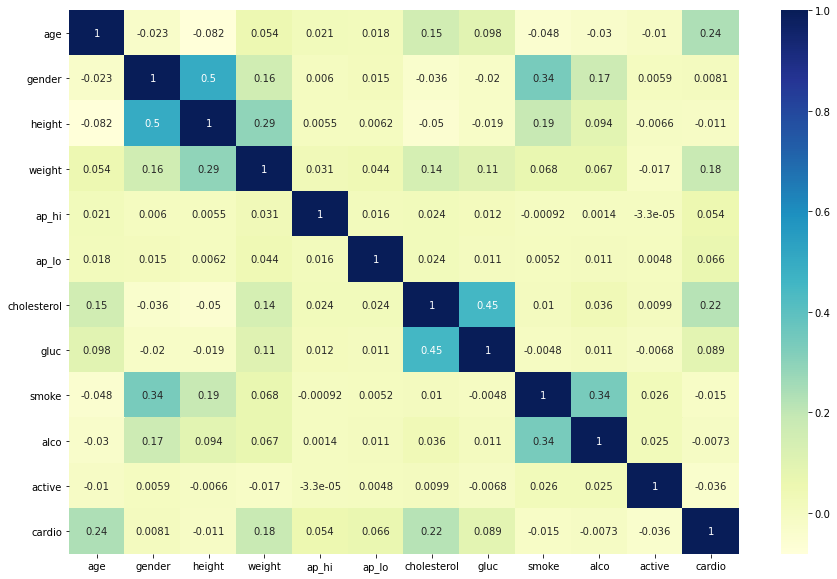

In [10]:
fig, htmp = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,ax=htmp);
plt.show()

In [11]:
fig.savefig('HeatMap.png')